In [1]:
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
torch.manual_seed(0)

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image

IMAGE_SIZE = 16

def show_data(data_sample):
  plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE,IMAGE_SIZE),cmap='gray')
  plt.title('y= '+str(data_sample[1]))


100%|██████████| 26.4M/26.4M [00:03<00:00, 7.84MB/s]


Extracting .fashion/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to .fashion/data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 124kB/s]


Extracting .fashion/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to .fashion/data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 2.32MB/s]


Extracting .fashion/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to .fashion/data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 16.4MB/s]


Extracting .fashion/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to .fashion/data/FashionMNIST/raw



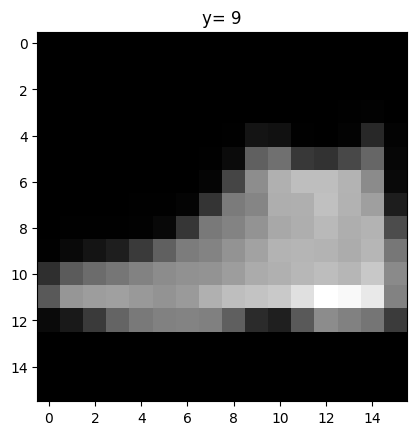

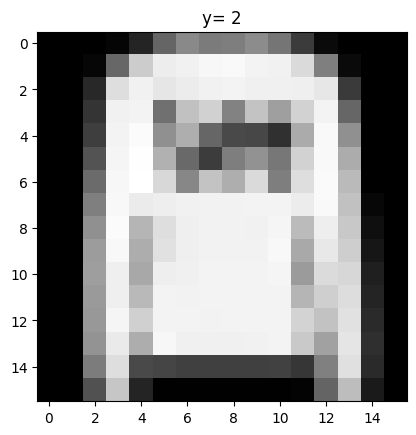

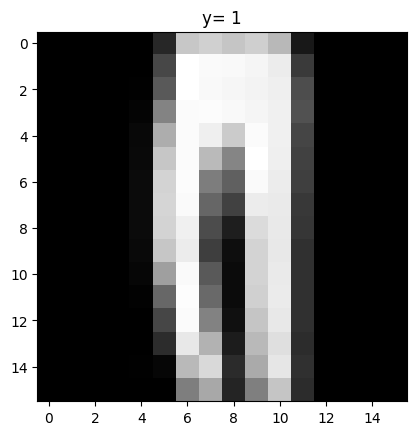

In [2]:
from enum import EnumMeta
# Q1 create a dataset
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)), transforms.ToTensor()])
dataset_train = dsets.FashionMNIST(root= '.fashion/data', train=True, transform=composed,  download=True)
dataset_val = dsets.FashionMNIST(root='.fashion/data',train=False,download=True,transform = composed)

for n,data_sample in enumerate(dataset_val):
  show_data(data_sample)
  plt.show()
  if n==2:
    break

In [5]:
# Q2 Create a Convolutional Neural Network class using ONE of the following constructors.
# Train the network using the provided code then provide a screenshot of your training cost and accuracy with your validation data.

class CNN_batch(nn.Module):
  def __init__(self,out_1=16,out_2=32,number_of_classes = 10):
    super(CNN_batch,self).__init__()
    self.cnn1 = nn.Conv2d(in_channels=1,out_channels=out_1,kernel_size=5,padding=2)
    self.conv1_bn = nn.BatchNorm2d(out_1)
    self.maxpool1=nn.MaxPool2d(kernel_size=2)

    self.cnn2 = nn.Conv2d(in_channels=out_1,out_channels=out_2,kernel_size=5,padding=2)
    self.conv2_bn = nn.BatchNorm2d(out_2)
    self.maxpool2=nn.MaxPool2d(kernel_size=2)

    self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
    self.bn_fc1 = nn.BatchNorm1d(10)

  def forward(self,x):
    x = self.cnn1(x)
    x = self.conv1_bn(x)
    x = torch.relu(x)
    x = self.maxpool1(x)
    x = self.cnn2(x)
    x = self.conv2_bn(x)
    x = torch.relu(x)
    x = self.maxpool2(x)
    x = x.view(x.size(0), -1)
    x = self.fc1(x)
    x = self.bn_fc1(x)
    return x

train_loader = torch.utils.data.DataLoader(dataset = dataset_train,batch_size = 100)
val_loader = torch.utils.data.DataLoader(dataset = dataset_val , batch_size = 100)
model =CNN_batch(out_1=16, out_2=32,number_of_classes=10)

criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

import time
start_time = time.time()
cost_list = []
accuracy_list = []
N_test = len(dataset_val)

n_epochs = 5
for epoch in range(n_epochs):
  cost = 0
  model.train()
  for x,y in train_loader:
    optimizer.zero_grad()
    yhat = model(x)
    loss = criterion(yhat,y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    cost += loss.item()

  correct = 0
  model.eval()
  for x_test,y_test in val_loader:
    z = model(x_test)
    _,yhat = torch.max(z.data,1)
    correct += (yhat == y_test).sum().item()
  accuracy = correct / N_test
  accuracy_list.append(accuracy)
  cost_list.append(cost)

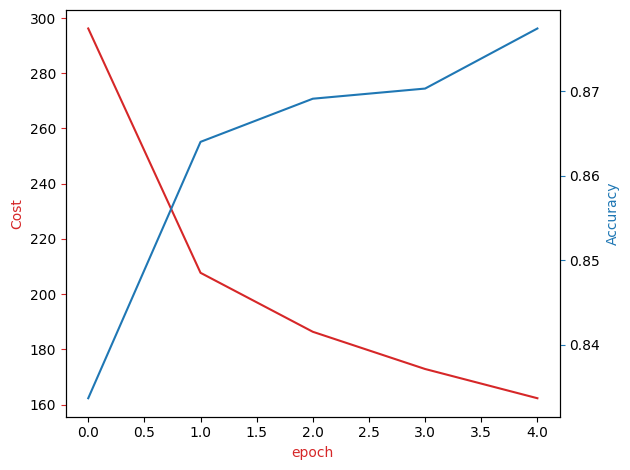

In [6]:
fig,ax1 = plt.subplots()
color = 'tab:red'

ax1.plot(cost_list,color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(accuracy_list,color = color)
ax2.set_ylabel('Accuracy',color = color)
ax2.tick_params(axis='y', color=color)

fig.tight_layout()